<a href="https://colab.research.google.com/github/HowardHNguyen/Natural_Language_Processing-NLP/blob/main/NLP_Sentiment_Analysis_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/50k-movie-reviews.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Data Exploration**

In [4]:
df.shape

(50000, 2)

In [5]:
df = df.iloc[:10000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

# **Data Processing**

In [13]:
import re
def remove_tags(text):
    text = re.sub('<[^>]*>', '', text)
    return text
df['review'] = df['review'].apply(remove_tags)

In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [16]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [17]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [19]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
df['review'][0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [21]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [22]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [25]:
X

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."
...,...
9995,"fun, entertaining movie wwii german spy (julie..."
9996,"give break. anyone say ""good hockey movie""? kn..."
9997,movie bad movie. watching endless series bad h...
9998,"movie probably made entertain middle school, e..."


In [26]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(7986, 1)

In [29]:
X_test.shape

(1997, 1)

# **Bag of Words (BoW)**

In [30]:
# implement BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [31]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)

MultinomialNB()

In [35]:
y_pred = nb.predict(X_test_bow)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8587881822734101

The Test accuracy is 85.87%

In [36]:
confusion_matrix(y_test, y_pred)

array([[866, 119],
       [163, 849]])

[[TN, FP]

[FN, TP]]

- 866 samples are correctly classified as negative (True Negatives).
- 119 samples are incorrectly classified as positive (False Positives).
- 163 samples are incorrectly classified as negative (False Negatives).
- 849 samples are correctly classified as positive (True Positives).

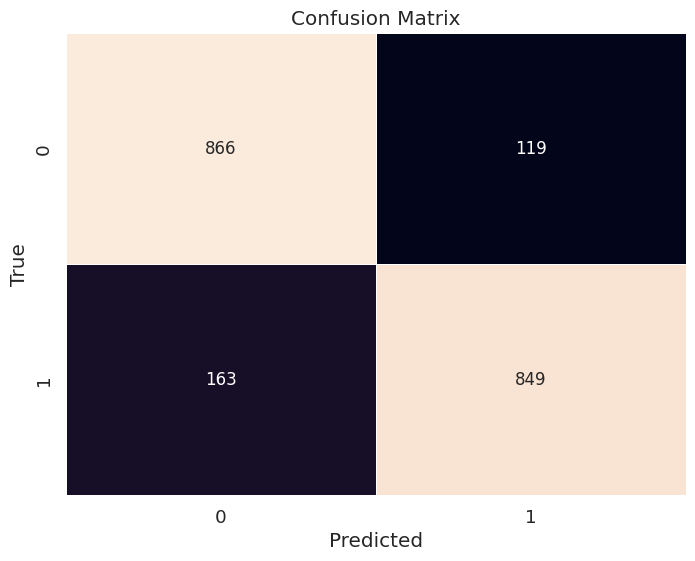

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion metrix
cm = confusion_matrix(y_test, y_pred)

# heatmap for the cm
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cbar=False, annot_kws={"size": 12}, linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test, y_pred)

0.8527791687531296

The accuracy score is 0.8527 means that our model correctly classified approximately 85.27% of the samples in the test dataset.

# **N-grams**

In [44]:
cv = CountVectorizer(ngram_range=(1,2), max_features=5000)
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test, y_pred)

0.8457686529794692

# **TFIDF**

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.8517776664997496

In [47]:
# function for sentiment prediction
def predict_sentiment(text):
  # preprocess the input text using TF-IDF vectorizer
  text = tfidf.transform([text]).toarray()
  # predict the sentiment
  prediction = rf.predict(text)
  # return the sentiment
  return prediction

In [53]:
# example usage:
input_text = "good to see this movie"
predicted_label = predict_sentiment(input_text)

print(f'sentiment prediction (0 for positive, 1 for negative): {predicted_label}')


sentiment prediction (0 for positive, 1 for negative): ['positive']
